In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras

In [20]:
# 데이터 준비 1 : colab 제공 mnist 기본 데이터
mnist_train1 = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
mnist_train2 = pd.read_csv('sample_data/mnist_train_small.csv')
# mnist_train.shape

In [13]:
mnist_train1.iloc[:5, -5:]

,780,781,782,783,784
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [18]:
mnist_train2.iloc[:5, -5:]

,0.586,0.587,0.588,0.589,0.590
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [2]:
# 데이터 준비 2 : keras 제공 mnist 기본 데이터
(X_train, y_train), (X_test, y_test) = tf_keras.datasets.mnist.load_data()
X_train.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

5


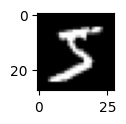

In [3]:
# 데이터 확인
print(y_train[0])
plt.figure(figsize=(1, 1))
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [3]:
# 입력 데이터 구조 변경 : 28 X 28 -> 784 (2차원 -> 1차원)
flatten_X_train = X_train.reshape(-1, 28*28)
# print( X_train.shape, flatten_X_train.shape, X_train.dtype, flatten_X_train.dtype, flatten_X_train.max() )
flatten_X_train = flatten_X_train.astype('float32') / 255 # flatten_X_train.max() # 0 ~ 1사이의 데이터로 변환
flatten_X_test = X_test.reshape(-1, 28*28)
flatten_X_test = flatten_X_test.astype('float32') / 255 # flatten_X_test.max() # 0 ~ 1사이의 데이터로 변환

In [4]:
model = tf_keras.Sequential([
    tf_keras.layers.Input(shape=(784, )),
    tf_keras.layers.Dense(512, activation='relu'),
    tf_keras.layers.Dense(256, activation='relu'),
    tf_keras.layers.Dense(10, activation='softmax') # 마지막 레이어의 노드 갯수는 타겟 값 종류의 갯수와 일치하도록 설정
])

In [ ]:
flatten_X_train.min(), flatten_X_train.max()

(0.0, 1.0)

In [26]:
784*512 + 512

401920

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy', #  categorical_crossentropy
              metrics=['accuracy']) # 학습 방법 설정 ( 최적화 )

In [6]:
model.fit(flatten_X_train, y_train, batch_size=256, epochs=10)

Epoch 1/10
235/235 [==============================] - 2s 3ms/step - loss: 0.2902 - accuracy: 0.9114
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1028 - accuracy: 0.9679
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0661 - accuracy: 0.9791
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0459 - accuracy: 0.9853
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0328 - accuracy: 0.9894
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0238 - accuracy: 0.9924
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0182 - accuracy: 0.9941
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0133 - accuracy: 0.9959
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0109 - accuracy: 0.9966
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0082 - accuracy: 0.9975

In [8]:
model.evaluate(x=flatten_X_train, y=y_train), model.evaluate(x=flatten_X_test, y=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9816


([0.006662346888333559, 0.997866690158844],
 [0.0734085664153099, 0.9815999865531921])

In [23]:
predicted_values = model.predict(flatten_X_test[0].reshape(-1, 28*28)) # 예측은 입력 설계와 동일한 차원으로 구성
predicted_values = model.predict(flatten_X_test[:1])

1/1 [==============================] - 0s 81ms/step


In [9]:
predicted_values = model.predict(flatten_X_test)

313/313 [==============================] - 1s 1ms/step


In [15]:
print( predicted_values.shape )
print( predicted_values[:2] )

(10000, 10)
[[1.45056356e-10 7.16018966e-10 9.21583343e-09 1.19126994e-07
  1.90318976e-11 1.75467557e-11 1.41572843e-15 9.99999404e-01
  5.38595939e-11 4.23371375e-07]
 [1.46949044e-12 3.13597148e-10 9.99999762e-01 2.68507364e-07
  6.59067982e-18 2.81613118e-11 7.82181069e-13 2.17451505e-15
  6.39674647e-10 2.88515092e-16]]


In [12]:
sparse_predicted_values = predicted_values.argmax(axis=1) # argmax : 제일 큰 값이 있는 위치 반환

In [ ]:
print( sparse_predicted_values.shape )
print( sparse_predicted_values[:5] )

In [14]:
(sparse_predicted_values == y_test).sum() / y_test.shape[0]

0.9816